![image](https://www.earth.ac.cr/wp-content/themes/cummins/images/logo-es.png)
## Curso de Programación aplicada a la agricultura
###Material de apoyo Tema Análisis de Datos
# Jupyter_5 Principios de los algoritmos de aprendizaje automático

### Preparado por:
Prof. Gregory Guevara, 
Enero 2023, gguevara@earth.ac.cr


**Aprendizaje Automatico**

Principios de Aprendizaje Supervisado##

En este trabajo se seleccionará un conjunto de datos (dataset) de alguna de las fuentes propuestas en clase, o bien de algún repositorio que considere oportuno. Se llevarán a cabo diferentes tareas de aprendizaje automático (tipo benchmark) y se hará un análisis de los resultados y estrategia de diseño de los diferentes experimentos propuestos por ustedes.

Diagrama: ![](https://cdn-images-1.medium.com/max/1600/1*eE8DP4biqtaIK3aIy1S2zA.png)

![](https://somospnt.com/images/blog/articulos/machine-learning/082918_1102_WhatisMachi5.png)

Diagrama: ![](https://live.staticflickr.com/65535/48051633738_096b38a7db_b.jpg)

#Preprocesado de los Datos#

In [ ]:
import torch 
import math 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

##Paso 1. Descripción de los datos.
## Análisis de un DATA SET climático para evaluar relaciones entre parámetros metereológicos. 

Fuente de data: 
![](https://power.larc.nasa.gov/data-access-viewer/widgets/Information/images/POWER_logo.png)

El conjunto de datos fue tomado de NASA/POWER DATA ACCESS https://power.larc.nasa.gov/data-access-viewer/ , capturando datos climáticos de los misiones satelitales 
 - CERES y M
 - ERRA2 Native Resolution Daily Data

#### Datos Geográficos   
- Latitude  10.6259   
- Longitude -85.5294 
- Finca Campus LA FLOR Universidad EARTH.
- Libería Guanacaste 

##### Datos Temporales 
- Fecha de incio: 1 de enero del 2001
- Fecha final: 31 de diciembre del 2020
- 2 Décadas de datos climáticos 

De esta herramienta se descargo las 2 últimas decadas de datos climáticos a partir de satelites de NASA en sus misiones MERRA-2 y CERES. 

### Objetivo 

Analizar el comportamiento de la EVAPOTRANSPIRACION (requerimiento de agua por el ambiente) en términos de otras variables climáticas, usando Data sets 

### Descripción de los datos 

El conjunto de datos, en formato CSV (columnas separadas por coma), contiene 10 columnas, las columnas según su orden indica lo siguiente 

0. year: años de los datos, los cuales van desde 2001 hasta el 2020 (2 decadas)
1. DOY: day of the year (día del año)
2. top_rad:  top_radiation o radiación al tope de la admósfera (MJ/m2/día)
3. surface_rad: Radiación en la superficie de la tierra (MJ/m2/día)
4. uva-ra: radiación ultravioleta (W/m2-día)
5. t_min: temperatura mínima (°C)
6. t_max: temperatura máxima (°C) 
7. prec: precipitación (mm/día)
8. rel_hum: humedad relativa en %
9. surface_pres: presión barométrica (KPa)
10. eto: evapotranspiración potencial (mm/día)





## Paso 2. Apertura de los datos 


(7305, 11)

##Paso 3. Se analizan datos faltantes 

Se analiza la cantidad de datos faltantes 

A continuación el proceso de limpieza de datos


(7146, 11)


,YEAR,DOY,top_rad,surface_rad,uva-ra,t_min,t_max,prec,rel_hum,surface_pres,eto
count,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000
mean,2010.547019,182.890428,35.353855,18.883529,13.644184,24.272491,31.702776,4.679163,75.356579,99.904643,4.084266
std,5.790641,105.550799,2.461045,3.733363,2.231266,1.121527,2.898399,11.850426,11.187449,0.120383,1.022427
min,2001.000000,1.000000,30.600000,2.680000,2.510000,19.530000,24.230000,0.000000,47.750000,99.460000,1.486210
25%,2005.000000,91.000000,33.210000,16.610000,12.350000,23.610000,29.430000,0.030000,64.940000,99.820000,3.315672
50%,2011.000000,182.000000,36.890000,19.180000,13.800000,24.380000,31.180000,0.820000,78.090000,99.910000,3.890909
75%,2016.000000,274.000000,37.280000,21.450000,15.150000,25.010000,34.040000,4.817500,85.060000,99.980000,4.863376
max,2020.000000,366.000000,37.900000,27.810000,18.900000,27.730000,39.010000,522.580000,94.000000,100.340000,6.570571


#### Se observa que en la columna de  precipitación hubo días de 500 mm o más, estos son eventos climáticos extremos, los cuales vamos a eliminar y  solo aceptaremos días con precipitaciones de no más  50 mm 

**se uso 50 mm como criterio base de infiltración, el resto del agua se constituye en escorrentía segun los balances hídricos**

In [ ]:
# depuración de los outliears  


(7099, 11)



## Paso 4. se realizan gráficos exploratorios

In [ ]:
#Usando Seaborn generamos un para de dispersión entre factores para observar relaciones
sns.pairplot(df);

In [ ]:
# de forma similar contruimos un mapa de calor y observamos las correlaciones entre los factores 

def correlation_heatmap(df):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)


'\ndef correlation_heatmap(df):\n    _,ax=plt.subplots(figsize=(15,10))\n    colormap=sns.diverging_palette(220,10,as_cmap=True)\n    sns.heatmap(df.corr(),annot=True,cmap=colormap)\n    \ncorrelation_heatmap(df)\n'

####  Se concluye de los gráficos anteriores que:

    
 #### A Partir de lo anterior definimos gráficos que visualicen las relaciones

## Paso 5. Se establece una relación gráfica entre los factores de temperatura y radiación con respecto a ETO.


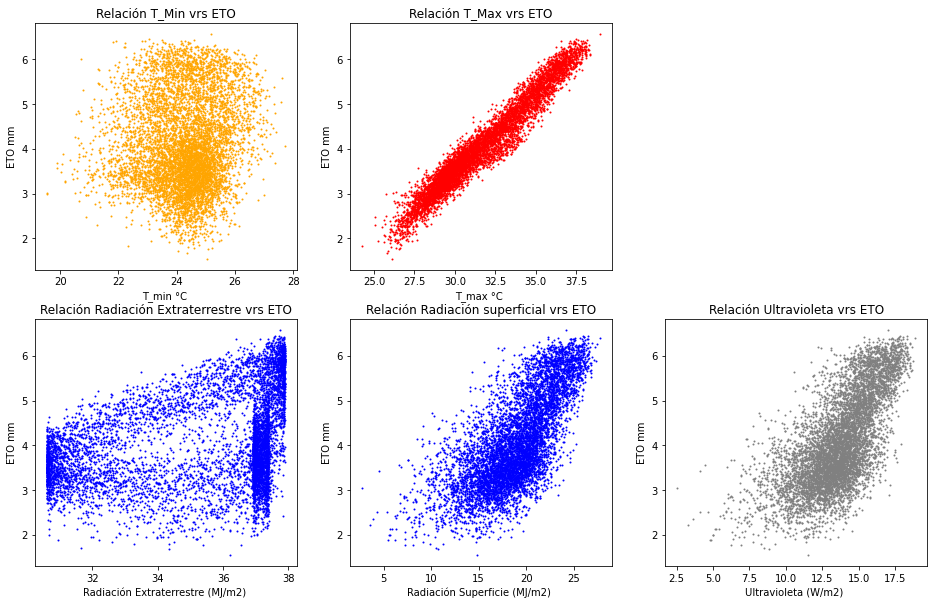

#### Interesante que de forma específica se encuentra que la EVAPOTRANPIRACION esta directamente influenciada por todo el Data Set por tres parámetros climáticos como lo son:
- Temperatura máximas del día 
- Radiación en la superficie 

## Paso 6. Se grafíca el comportamiento anual de la evapotranspiración vrs temperatura y radiación. 

In [ ]:
# Ordenamos los datos las medias de los datos por día del año y vemos como se comporta la evapotrasnpiración en función de los variables radiación y temperatura 

    

(366, 10)


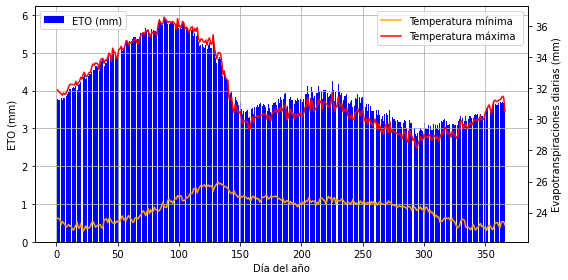

In [ ]:
# observamos el comportamiento de la temperatura 


#### Se concluye que existe una relación lineal entre la temperatura máxima y la evapotranspiración 

Este dato es muy importante para cuando construyamos el vector con los pesos de cada factor 


# Aprendizaje Supervisado

##Paso 1. Definicion de funciones para poder analizar el DataSet con diferentes enfoques usando varios metodos

In [ ]:
#Funcion para division de Datos para Training and Testing
def Data_Segregation(features,targets, x=5, verification = False):
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(features,targets, random_state=x) 

  #Verificamos los tamaños:
  if verification:
    print("Segregation verification, sizes:")
    print("X_train= ",X_train.shape)
    print("X_test= ",X_test.shape)
    print("y_train= ",y_train.shape)
    print("y_test= ",y_test.shape)

  return X_train, X_test, y_train, y_test


In [ ]:
#Funcion para correr un modelo lineal 
def Linear_Regression(X_train, X_test, y_train, y_test, showScore = False, positiveBool=False):
  from sklearn.linear_model import LinearRegression
  lr=LinearRegression(positive = positiveBool).fit(X_train,y_train)

  trainScore = lr.score(X_train,y_train)
  testScore = lr.score(X_test,y_test)                      
  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)
  
  return trainScore, testScore


In [ ]:
#Funcion para correr modelo lineal Ridge
def LRRidge(X_train, X_test, y_train, y_test, showScore = False, positiveBool=False, alphaNum = 1.0):
  from sklearn import linear_model
  reg = linear_model.Ridge(alpha=alphaNum, positive = positiveBool).fit(X_train,y_train)
  
  trainScore = reg.score(X_train,y_train)
  testScore = reg.score(X_test,y_test)                      
  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)
  
  return trainScore, testScore

In [ ]:
#Funcion para correr SVM
def SVMachine(X_train, X_test, y_train, y_test, showScore = False, kernelStr="rbf", Creg=1.0, gammaStr="scale"):
  from sklearn.svm import SVR
  LinearSVR = SVR(kernel = kernelStr, C = Creg, gamma = gammaStr)

  #svr=LinearSVR().fit(X_train,y_train)
  LinearSVR.fit(X_train,y_train)

  trainScore = LinearSVR.score(X_train,y_train)
  testScore = LinearSVR.score(X_test,y_test)    

  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)

  return trainScore, testScore


In [ ]:
#Funcion para correr Nearest Neighbors Regression
def kNNRegression(X_train, X_test, y_train, y_test, showScore = False, n=5,weightsStr="uniform", algorithmStr="auto"):
  from sklearn.neighbors import KNeighborsRegressor
  neigh = KNeighborsRegressor(n_neighbors=n,weights=weightsStr, algorithm=algorithmStr)
  neigh.fit(X_train, y_train)

  trainScore = neigh.score(X_train,y_train)
  testScore = neigh.score(X_test,y_test) 

  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)

  return trainScore, testScore


In [ ]:
#Funcion para usar DecisionTreeRegressor

def DTRegressor (X_train, X_test, y_train, y_test, showScore = False, showClassifier = False, n=100, criterionStr = "squared_error", depth=None):
  from sklearn.ensemble import RandomForestRegressor
  reg_forest = RandomForestRegressor(n_estimators = n, criterion = criterionStr, max_depth = depth)
  reg_forest = reg_forest.fit(X_train, y_train)

  trainScore = reg_forest.score(X_train,y_train)
  testScore = reg_forest.score(X_test,y_test) 

  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)

  if showClassifier:
    print("Showing importances features classification:")
    from sklearn.ensemble import RandomForestClassifier
    importances = pd.DataFrame({'feature' : X_train.columns, 'importance':reg_forest.feature_importances_})
    importances = importances.sort_values('importance', ascending = False).set_index('feature')
    from matplotlib import pyplot as plt
    plt.style.use('ggplot')
    importances.plot.bar()

  return trainScore, testScore


## Paso 2. Seleccion de columnas, division de los datos para entrenamiento y prueba, y definicion de Casos.



**Descripcion de la dinamica:**
Se usara el mismo DataSet anlizado en el pre-procesado, solo que se dividiran en diferentes casos, para poder analizar los datos con diferentes herramientas y tambien ver las diferentes relaciones entre las variables:



**Caso 1: Se usaran las radiciones y temperaturas para poder predecir el ETO**
- Features: 'top_rad','surface_rad','t_max'
- Targets: 'eto'

El objetivo de este caso es verificar la relacion lineal encontrada en el pre-procesado entre la temperatura maxima y el ETO

**Caso 2: Se usaran las demas caracteristicas, excluyendo ETO, para poder predecir la temperatura maxima**
- Features: 'top_rad','surface_rad','uva-ra','rel_hum','surface_pres','prec'
- Targets: 't_max'

El objetivo de este segundo caso es entender la relacion de las demas caracteristicas o variables con la temperatura maxima, ya que al parecer es la predominante al relacionarse con el ETO

In [ ]:
#Seleccioamos solo las columnas a usar


(7099, 8)

##Paso 3: Caso 1. Aplicacion de los difernetes metodos de regresion

Definicion de Features y Targets, con la separacion de los Datos para Training & Testing

In [ ]:
#Definicion de features o targets, segun caso


In [ ]:
#Uso de funcion Data_Segregation, con un random_state de 13 y la visualizacion de tamanos activa


Segregation verification, sizes:
X_train=  (5324, 3)
X_test=  (1775, 3)
y_train=  (5324,)
y_test=  (1775,)


### Aplicacion de los modelos de regresion 

In [ ]:
#Creacion de un DataFrame para almacenar los diferentes Scores 


####Modelos Lineales

In [ ]:
#Uso de funcion Linear_Regression, con visualizacion de Scores y opcion de Non-negative least squares en el ultimo parametro de la funcion
#("When set to True, forces the coefficients to be positive")


Ordinary Least Squares
Train score=  0.9632280104173241
Test score=  0.9623943370092025


Ordinary Least Squares and Non-negative least squares
Train score=  0.9632280104173241
Test score=  0.9623943370092024


#### Modelo Maquina de Soporte Vectorial 

In [ ]:
#Uso de la funcion SVMachine con visualizacion de Scores, definicion de Kernel, C y gamma
print("SVM with kernel = rbf, C = 1 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "rbf", 1, "auto")
dfScores = dfScores.append({'Model': "SVM", 'Training Score' : a, 'Testing Score' : b, 'Details': "kernel = rbf, C = 1 and gamma = auto"}, ignore_index = True)
print("\n")
print("SVM with kernel = rbf, C = 10 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "rbf", 10, "auto")
dfScores = dfScores.append({'Model': "SVM", 'Training Score' : a, 'Testing Score' : b, 'Details': "kernel = rbf, C = 10 and gamma = auto"}, ignore_index = True)
print("\n")
print("SVM with kernel = linear, C = 1 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "linear", 1, "auto")
dfScores = dfScores.append({'Model': "SVM", 'Training Score' : a, 'Testing Score' : b, 'Details': "kernel = linear, C = 1 and gamma = auto"}, ignore_index = True)
print("\n")
print("SVM with kernel = linear, C = 10 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "linear", 10, "auto")
dfScores = dfScores.append({'Model': "SVM", 'Training Score' : a, 'Testing Score' : b, 'Details': "kernel = linear, C = 10 and gamma = auto"}, ignore_index = True)
print("\n")
print("SVM with kernel = linear, C = 1 and gamma = scale")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "linear", 1, "scale")
dfScores = dfScores.append({'Model': "SVM", 'Training Score' : a, 'Testing Score' : b, 'Details': "kernel = linear, C = 10 and gamma = scale"}, ignore_index = True)
print("\n")

SVM with kernel = rbf, C = 1 and gamma = auto
Train score=  0.975877591751733
Test score=  0.9676250537503345


SVM with kernel = rbf, C = 10 and gamma = auto
Train score=  0.977775715539438
Test score=  0.9660784213425844


SVM with kernel = linear, C = 1 and gamma = auto
Train score=  0.9632104555007702
Test score=  0.9623187496119315


SVM with kernel = linear, C = 10 and gamma = auto
Train score=  0.9632145196097815
Test score=  0.9623425260443068


SVM with kernel = linear, C = 1 and gamma = scale
Train score=  0.9632104555007702
Test score=  0.9623187496119315




#### KNN KNeighbors Regressor 

In [ ]:
#Uso de la funcion kNNRegression con visualizacion de Scores, definicion de neighbors, weights y algorithm

#kNNRegression(X_train, X_test, y_train, y_test, showScore, n, weights, algorithm)
#n: Number of neighbors to use
#weights = 'uniform', assigns equal weights to all points. 
#weights = 'distance' assigns weights proportional to the inverse of the distance from the query point
#algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
#Algorithm used to compute the nearest neighbors

print("\n")

KNN regression with neighbors = 2, weights = uniform and  algorithm = auto
Train score=  0.9864094053889036
Test score=  0.9594363824618014


KNN regression with neighbors = 200, weights = uniform and  algorithm = auto
Train score=  0.9542581155709677
Test score=  0.9533264481682265


KNN regression with neighbors = 500, weights = uniform and  algorithm = auto
Train score=  0.9329065523047755
Test score=  0.9331751470914511


KNN regression with neighbors = 750, weights = uniform and  algorithm = auto
Train score=  0.9162300881014404
Test score=  0.9168944127835391


KNN regression with neighbors = 500, weights = distance and  algorithm = auto
Train score=  1.0
Test score=  0.9443992230509928




#### Decision Tree Regressor

In [ ]:
#Uso de la funcion DTRegressor con visualizacion de Scores, visualizacion de clasificacion de features, definicion de estimators, criterion y max_depth

#DTRegressor (X_train, X_test, y_train, y_test, showScore = False, showClassifier, n, criterion, max_depth)
#n_estimators: The number of trees in the forest.
#criterion : {"squared_error", "absolute_error", "poisson"}
#The function to measure the quality of a split. Supported criteria are "squared_error" for the mean squared error, 
#which is equal to variance reduction as feature selection criterion, "absolute_error" for the mean absolute error, 
#and "poisson" which uses reduction in Poisson deviance to find splits. Training using "absolute_error" is significantly 
#slower than when using "squared_error".
#max_depth: The maximum depth of the tree. 
#If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.



DecisionTreeRegressor with n_estimators = 10, criterion = squared_error and max_depth = None
Train score=  0.9940845398551923
Test score=  0.9644697282485543


DecisionTreeRegressor with n_estimators = 100, criterion = squared_error and max_depth = None
Train score=  0.9957378954569465
Test score=  0.9674639685083699


DecisionTreeRegressor with n_estimators = 10, criterion = squared_error and max_depth = 5
Train score=  0.9685464639848659
Test score=  0.9624422641597437


DecisionTreeRegressor with n_estimators = 10, criterion = absolute_error and max_depth = None
Train score=  0.9939459496353182
Test score=  0.9659260958835063


DecisionTreeRegressor with n_estimators = 10, criterion = poisson and max_depth = None
Train score=  0.9928818906622434
Test score=  0.9557079724759198




###Results Summary - Caso 1

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

#Desplegar tabla resumen de resultados
print("Scores Summary Table")
display(dfScores)
print("=========================================================================================================")
print("Highest Training Score:")
tempMaxScore = dfScores['Training Score'].max()
display(dfScores[dfScores['Training Score'] == tempMaxScore])
print("=========================================================================================================")
print("Highest Testing Score:")
tempMaxScore = dfScores['Testing Score'].max()
display(dfScores[dfScores['Testing Score'] == tempMaxScore])


Scores Summary Table


,Model,Training Score,Testing Score,Details
0,Ordinary Least Squares,0.963228,0.962394,N/A
1,Ordinary Least Squares,0.963228,0.962394,Non-negative least squares
2,Ridge regression,0.963228,0.962395,Alpha = 0.5
3,Ridge regression,0.963228,0.962395,Alpha = 1
4,Ridge regression,0.963228,0.962395,Alpha = 0.5 & Non-negative least squares
5,Ridge regression,0.963228,0.962395,Alpha = 1 & Non-negative least squares
6,SVM,0.975878,0.967625,"kernel = rbf, C = 1 and gamma = auto"
7,SVM,0.977776,0.966078,"kernel = rbf, C = 10 and gamma = auto"
8,SVM,0.963210,0.962319,"kernel = linear, C = 1 and gamma = auto"
9,SVM,0.963215,0.962343,"kernel = linear, C = 10 and gamma = auto"


Highest Training Score:


,Model,Training Score,Testing Score,Details
15,KNN,1.0,0.944399,"neighbors = 500, weights = distance and algor..."


Highest Testing Score:


,Model,Training Score,Testing Score,Details
21,Voting Regressor,0.982954,0.970025,3 methods used
22,Voting Regressor,0.982954,0.970025,3 methods used


Decision Tree Regression - importances features
Train score=  0.99573808280077
Test score=  0.9673079697981001
Showing importances features classification:


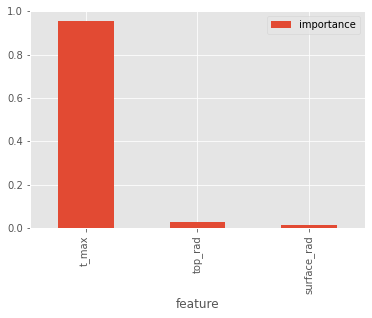

In [ ]:
print("Decision Tree Regression - importances features")
a, b = DTRegressor (X_train, X_test, y_train, y_test, True, True, 100, "squared_error", None)